TEST CHANGE

#### **Swan Project - Decision Trees**

In [6]:
# The big four libraries!
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Measure performance of our model.
from sklearn import metrics 

# Import the decision tree model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
swan = pd.read_csv('1 - Project Data.csv')

In [8]:
swan.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [9]:
swan.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [10]:
swan['Tenure Months']

0        2
1        2
2        8
3       28
4       49
        ..
7038    72
7039    24
7040    72
7041    11
7042    66
Name: Tenure Months, Length: 7043, dtype: int64

In [11]:
swan.shape

(7043, 31)

In [12]:
swan.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [13]:
swan['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [14]:
swan['Churn Reason'].value_counts()
# Could group these into three groups: Products, Swan Servies and Competitors. 

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

For the class imbalance: **model = DecisionTreeClassifier(class_weight=weights)**

In [15]:
swan.Contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [16]:
swan['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
swan['Monthly Charges'].mean()

64.7616924605991

In [18]:
swan.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

**Feature Engineering**

In [19]:
def yes_no(column):
    x=column
    if x=='Yes':
        return 1
    else:
        return 0
        
products = ['Product dissatisfaction', 'Network reliability', 'Lack of self-service on Website', 'Limited range of services', 'Long distance charges', 'Lack of affordable download/upload speed' ]
swan_services = ['Attitude of support person', 'Attitude of service provider',   'Price too high', 'Service dissatisfaction',  'Extra data charges', 'Poor expertise of phone support', 'Poor expertise of online support']
competitor_services = ['Competitor offered higher download speeds', 'Competitor offered more data', 'Competitor made better offer', 'Competitor had better devices']

def churn_reason(reason):
    if reason in products:
        return 'Issue with products' 
    elif reason in swan_services:
        return 'Issue with Swan Services' 
    elif reason in competitor_services:
        return 'Competitor offered better services'
    else:
        return 'Other'

#### **What factors influence Churning?**

In [20]:
def yes_no(column):
    x=column
    if x=='Yes':
        return 1
    else:
        return 0
    
def feature_eng(x):
    df=x.copy()
    yes_no_columns=['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                    'Online Security', 'Online Backup', 'Device Protection', 
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']
    for column in yes_no_columns:
        df[column]=df[column].apply(yes_no)     
    #df['Churn Category'] = df['Churn Reason'].apply(churn_reason)
    encoding_columns=['Contract','Payment Method', 'Internet Service'] #'Churn Category']
    encoding_prefix=['Contract','Payment', 'Internet'] #'Churn'
    df= pd.get_dummies(data=df, 
                       columns=encoding_columns, 
                       prefix=encoding_prefix, 
                       dtype=int)
    df.drop(columns = ['Count', 'Country', 'State', 'CustomerID','City', 'Churn Reason', 'Churn Label', 'Lat Long'], inplace= True)
    df = df.drop(df[df['Total Charges'] == ' '].index)
    df.Gender = df.Gender.map({'Male':0, 'Female':1})
    return df

In [22]:
# Correlation Table
feature_eng(swan).corr()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,Internet_DSL,Internet_Fiber optic,Internet_No
Zip Code,1.000000,0.895795,-0.784273,-0.016082,-0.006895,-0.006344,0.009995,0.000287,-0.004880,-0.017844,...,-0.005170,0.002135,0.003989,0.007112,-0.006005,-0.003532,0.002856,-0.007505,-0.002143,0.011244
Latitude,0.895795,1.000000,-0.876777,-0.009147,-0.010592,-0.007864,0.018755,-0.002100,-0.013034,-0.024470,...,-0.004808,0.001078,0.004576,0.002217,-0.007755,-0.002363,0.008084,-0.002149,-0.017262,0.023298
Longitude,-0.784273,-0.876777,1.000000,0.010610,0.008890,0.008300,-0.014508,-0.001477,0.013717,0.022762,...,0.008268,0.003833,-0.013288,-0.006001,-0.000084,0.016034,-0.012053,0.013192,0.014822,-0.033095
Gender,-0.016082,-0.009147,0.010610,1.000000,0.001819,0.001379,-0.004321,-0.005285,0.007515,0.008883,...,0.003251,-0.007755,0.003603,0.015973,-0.001632,-0.000844,-0.013199,-0.007584,0.011189,-0.004745
Senior Citizen,-0.006895,-0.010592,0.008890,0.001819,1.000000,0.016957,-0.174064,0.015683,0.008392,0.142996,...,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,-0.108276,0.254923,-0.182519
Partner,-0.006344,-0.007864,0.008300,0.001379,0.016957,1.000000,0.363166,0.381912,0.018397,0.142561,...,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.001043,0.001235,-0.000286
Dependents,0.009995,0.018755,-0.014508,-0.004321,-0.174064,0.363166,1.000000,0.133773,-0.000394,-0.028396,...,-0.174302,0.014849,0.188953,0.048779,0.042326,-0.140707,0.068798,0.020917,-0.161401,0.170519
Tenure Months,0.000287,-0.002100,-0.001477,-0.005285,0.015683,0.381912,0.133773,1.000000,0.007877,0.332399,...,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,0.013786,0.017930,-0.037529
Phone Service,-0.004880,-0.013034,0.013717,0.007515,0.008392,0.018397,-0.000394,0.007877,1.000000,0.279530,...,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-0.452255,0.290183,0.171817
Multiple Lines,-0.017844,-0.024470,0.022762,0.008883,0.142996,0.142561,-0.028396,0.332399,0.279530,1.000000,...,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672,-0.200318,0.366420,-0.210794


In [ ]:
(feature_eng(swan).corr(numeric_only=True)['Churn Value'].abs().sort_values(ascending=False))

In [ ]:
feature_eng(swan).columns

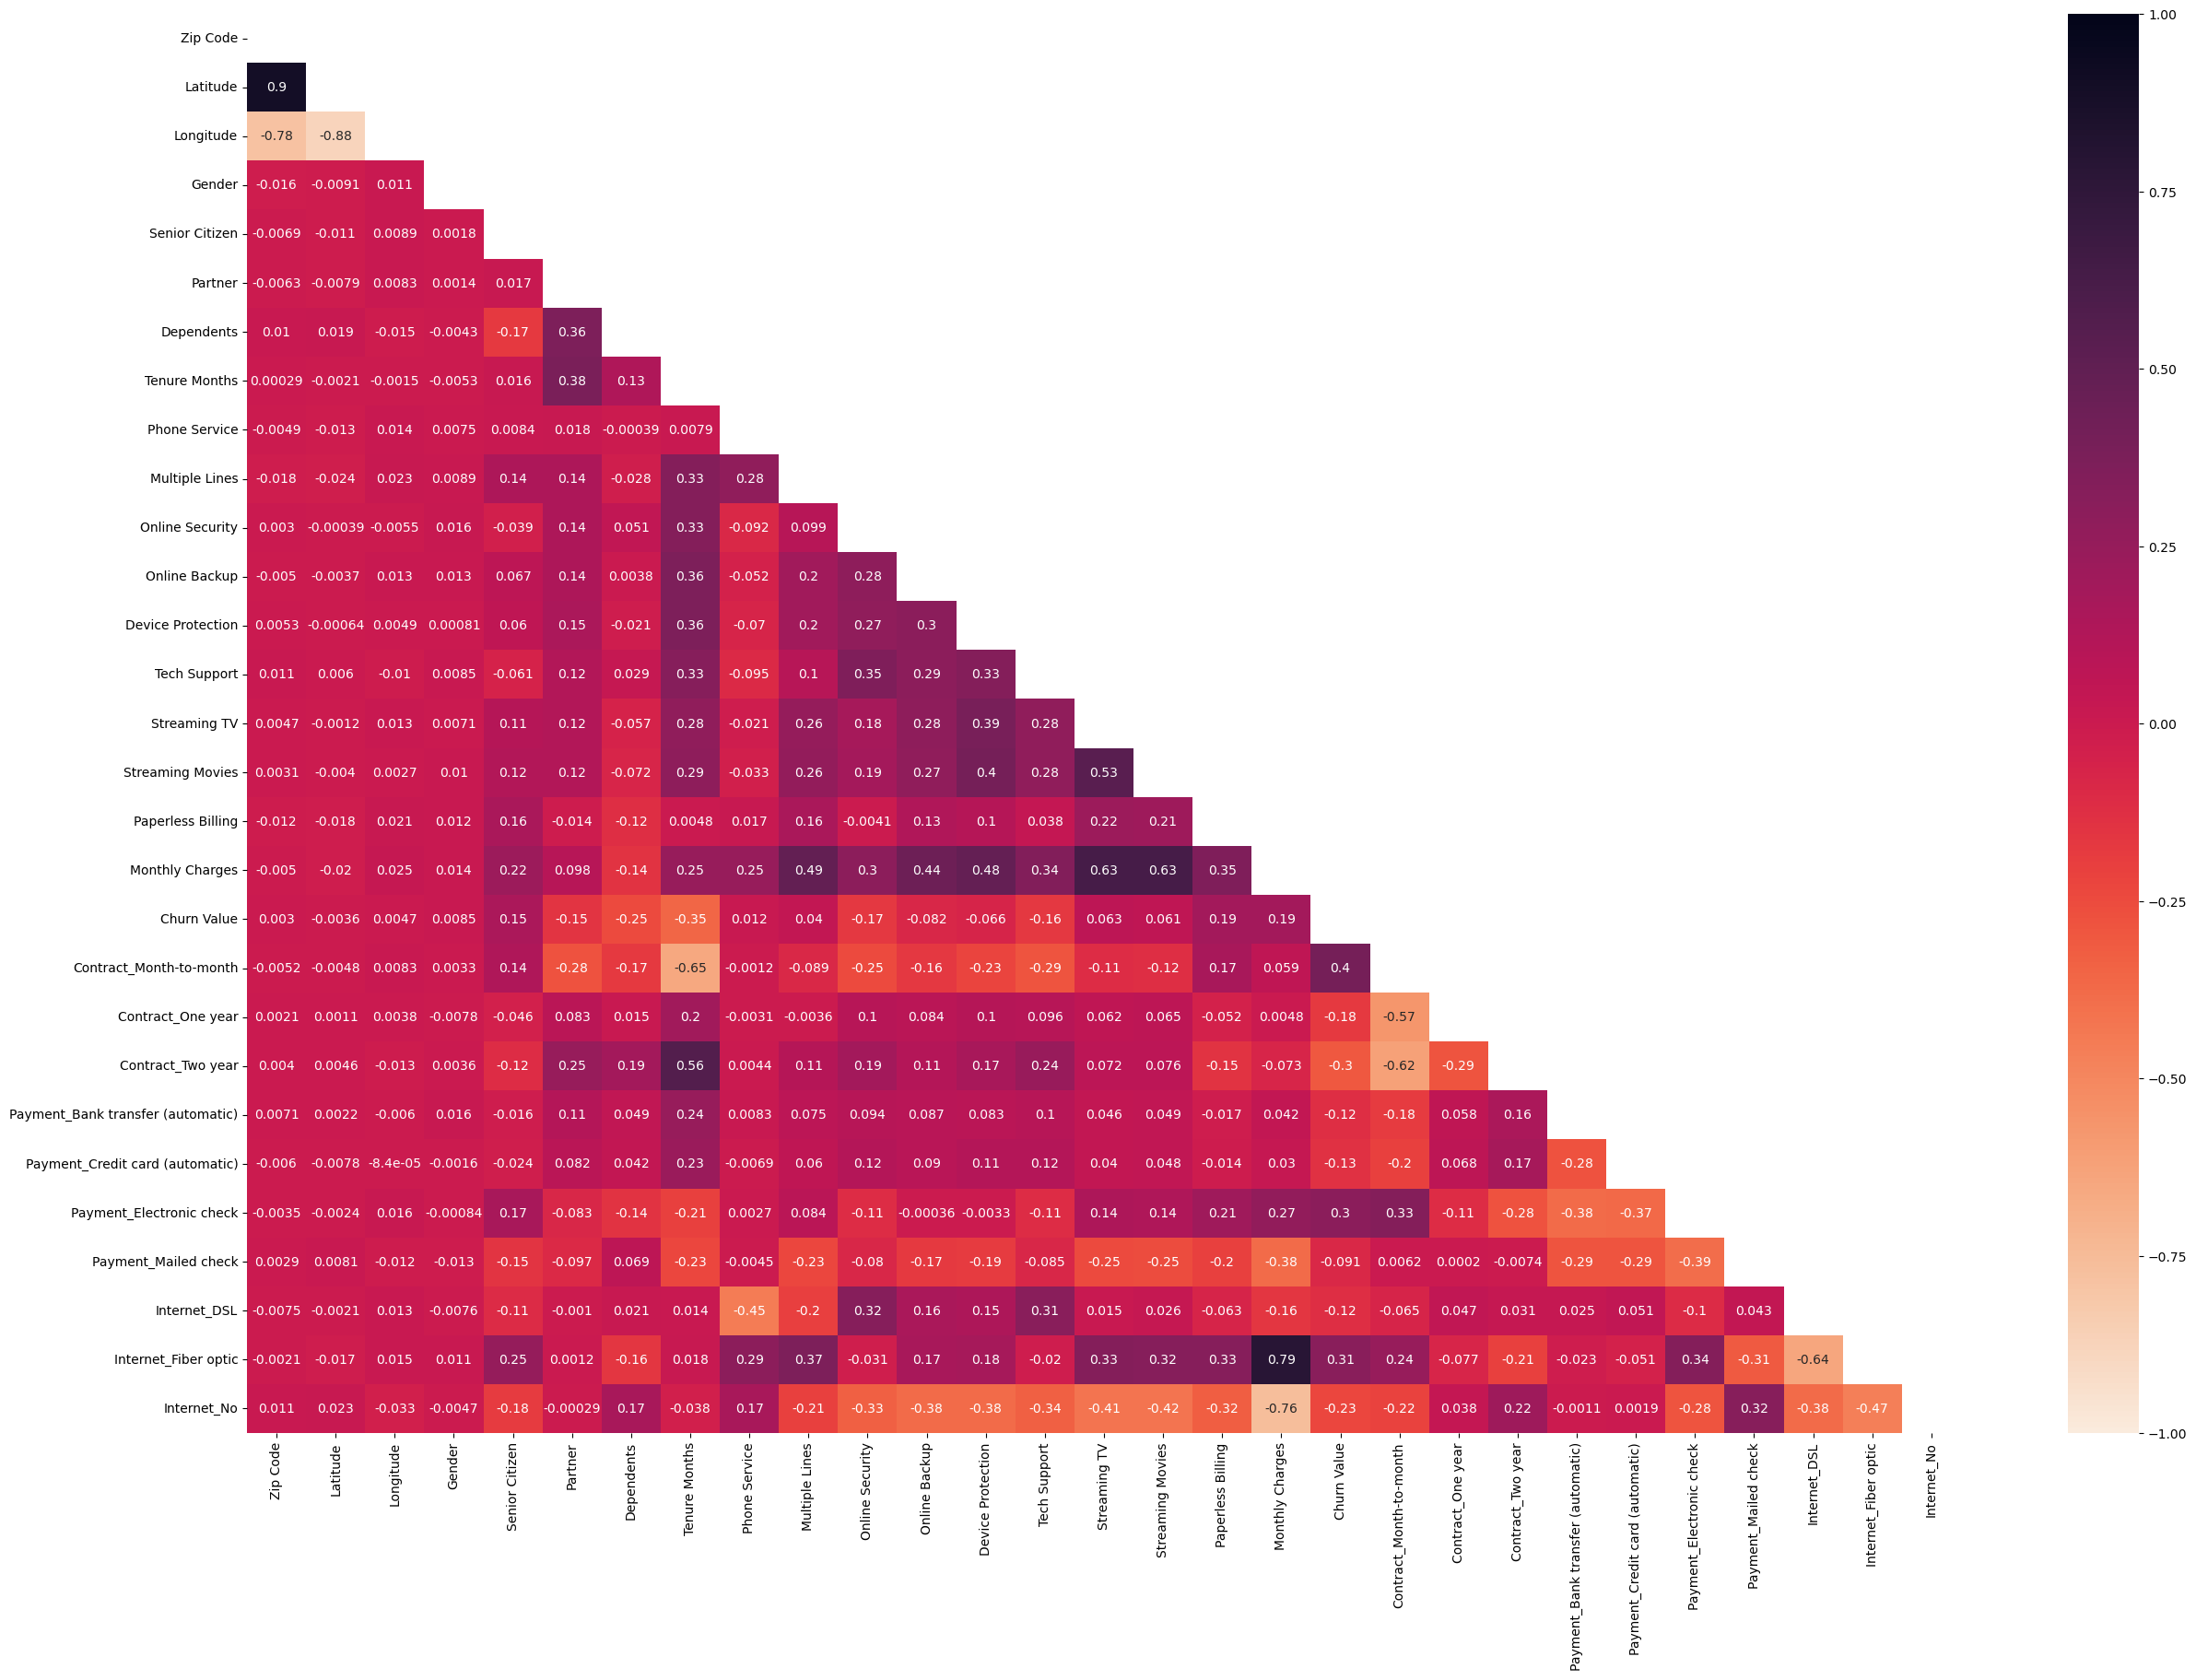

In [25]:
plt.figure(figsize = (30, 20))
sns.heatmap(feature_eng(swan).corr(),
            annot = True,
            fmt = '.2',
            cmap = 'rocket_r',
            mask = np.triu(feature_eng(swan).corr()),
            vmin = -1,
            vmax = 1)

plt.show()

#### **Logistic Regression Model**

In [ ]:
feature_eng(swan)

In [ ]:
df_model=feature_eng(swan).copy()

In [ ]:
df_model.head()

In [ ]:
df_model.loc[:,'Tenure Months':'Contract_Month-to-month']

In [ ]:
df_model.columns

In [ ]:
y = df_model['Churn Value'].copy()

In [ ]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.fit(df_model, y)

In [ ]:
len(y) == df_model.shape[0]

In [ ]:
Features = ['Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment_Bank transfer (automatic)',
       'Payment_Credit card (automatic)', 'Payment_Electronic check',
       'Payment_Mailed check', 'Internet_DSL', 'Internet_Fiber optic',
       'Internet_No']

In [ ]:
df_model.dtypes

In [ ]:
lr.fit(df_model, y)

In [ ]:
lr.predict_proba(df_model)

In [ ]:
df_model[['prob_churn', 'prob_not_churn']] = lr.predict_proba(df_model)

In [ ]:
df_model.head()

In [ ]:
df_model['y_pred'] = np.where(df_model['prob_churn']>.5, 1, 0)

In [ ]:
print(metrics.confusion_matrix(y, df_model['y_pred']))

In [ ]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [ ]:
get_results(y, df_model['y_pred'])

In [ ]:
print(metrics.classification_report(y, df_model['y_pred']))

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y, df_model['y_pred'])).plot()
plt.show()